In [46]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import requests
import seaborn as sns
from datetime import datetime

# Import API key
from config import api_key

## Generate list of N random cities

In [35]:
# This n determines how many cities we generate
# We also initialize our lists to track the cities

# I chose 700 because many cities will not have data available
# n=700 seemed safe in order to get above the 500 city threshold
n = 700
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

## Perform Weather Check Using API Calls

In [3]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

In [36]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | srivardhan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=srivardhan,IN
Processing record 2 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kavieng,PG
Processing record 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus,ZA
Processing record 4 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=richards bay,ZA
Processing record 5 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nizhneyansk,RU
Processing record 6 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=khatanga,RU
Processing record 7 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0b

Processing record 57 | fortuna foothills
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fortuna foothills,US
Processing record 58 | saint-leu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-leu,RE
Processing record 59 | damietta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=damietta,EG
Processing record 60 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife,CA
Processing record 61 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro,MG
Processing record 62 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kodiak,US
Processing record 63 | obihiro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a119

Processing record 114 | usakos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=usakos,NA
Processing record 115 | peleduy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=peleduy,RU
Processing record 116 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pevek,RU
Processing record 117 | tagbac
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tagbac,PH
Processing record 118 | gijon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gijon,ES
Processing record 119 | castro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=castro,CL
Processing record 120 | kusti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kusti

Processing record 171 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-philippe,RE
Processing record 172 | aitape
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aitape,PG
Processing record 173 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bathsheba,BB
Processing record 174 | guadalajara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=guadalajara,ES
Processing record 175 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=faanui,PF
Processing record 176 | casas grandes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=casas grandes,MX
Processing record 177 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=25

Processing record 226 | kyabram
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kyabram,AU
Processing record 227 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hofn,IS
Processing record 228 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bredasdorp,ZA
Processing record 229 | barawe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barawe,SO
Processing record 230 | gat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gat,LY
Processing record 231 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sitka,US
Processing record 232 | la rioja
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=la

Processing record 282 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hamilton,BM
Processing record 283 | lata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lata,SB
Processing record 284 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=torbay,CA
Processing record 285 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yar-sale,RU
Processing record 286 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rabo de peixe,PT
Processing record 287 | gizo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gizo,SB
Processing record 288 | warqla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units

Processing record 338 | tambacounda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tambacounda,SN
Processing record 339 | dukat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dukat,RU
Processing record 340 | dubbo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dubbo,AU
Processing record 341 | karasjok
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=karasjok,NO
Processing record 342 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sao paulo de olivenca,BR
Processing record 343 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manggar,ID
Processing record 344 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=25b

Processing record 394 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carutapera,BR
Processing record 395 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=noyabrsk,RU
Processing record 396 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wulanhaote,CN
Processing record 397 | beinamar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beinamar,TD
Processing record 398 | hearst
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hearst,CA
Processing record 399 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san carlos de bariloche,AR
Processing record 400 | visby
http://api.openweathermap.org/data/2.5/weather?a

Processing record 449 | liyang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=liyang,CN
Processing record 450 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=makakilo city,US
Processing record 451 | kindu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kindu,CD
Processing record 452 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tumannyy,RU
Processing record 453 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pisco,PE
Processing record 454 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=el alto,PE
Processing record 455 | las guacamayas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0f

Processing record 505 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=north bend,US
Processing record 506 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=la ronge,CA
Processing record 507 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=meulaboh,ID
Processing record 508 | san lorenzo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san lorenzo,AR
Processing record 509 | moratuwa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=moratuwa,LK
Processing record 510 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bosaso,SO
Processing record 511 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0

Processing record 561 | waterfoot
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=waterfoot,GB
Processing record 562 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sorvag,FO
Processing record 563 | kitami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kitami,JP
Processing record 564 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ancud,CL
Processing record 565 | kudat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kudat,MY
Processing record 566 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=umzimvubu,ZA
Processing record 567 | san rafael del sur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb

Processing record 616 | mishkino
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mishkino,RU
Processing record 617 | polewali
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=polewali,ID
Processing record 618 | almeirim
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=almeirim,BR
Processing record 619 | aripuana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aripuana,BR
Processing record 620 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sergeyevka,KZ
Processing record 621 | gopalpur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gopalpur,IN
Processing record 622 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

Processing record 672 | surgut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=surgut,RU
Processing record 673 | marquette
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marquette,US
Processing record 674 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coahuayana,MX
Processing record 675 | inirida
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inirida,CO
Processing record 676 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vanimo,PG
Processing record 677 | camacari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=camacari,BR
Processing record 678 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9

In [37]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 605 unique cities.


In [44]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,srivardhan,64,IN,1.527210e+09,91.0,18.03,73.02,79.80,7.07
1,kavieng,12,PG,1.527210e+09,100.0,-2.57,150.80,85.38,4.61
2,hermanus,76,ZA,1.527210e+09,100.0,-34.42,19.24,52.17,3.71
3,richards bay,0,ZA,1.527210e+09,97.0,-28.77,32.06,62.70,4.61
5,khatanga,88,RU,1.527210e+09,100.0,71.98,102.47,33.00,8.97


## Latitude vs. Max Temperature

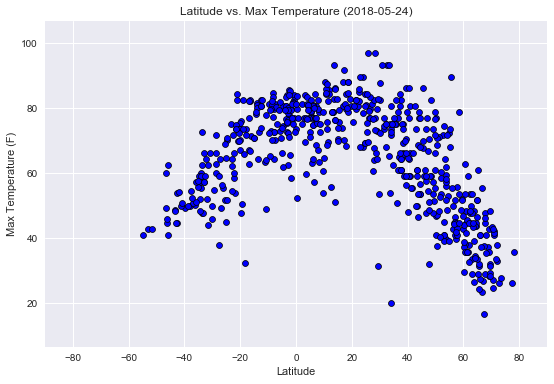

In [79]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-90,90)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)



plt.show()

'2018-05-25'